<a href="https://colab.research.google.com/github/Loretta991/Drug-Response-Predictor/blob/main/drug_response_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.66      0.60        59
           1       0.33      0.24      0.28        41

    accuracy                           0.49       100
   macro avg       0.45      0.45      0.44       100
weighted avg       0.47      0.49      0.47       100



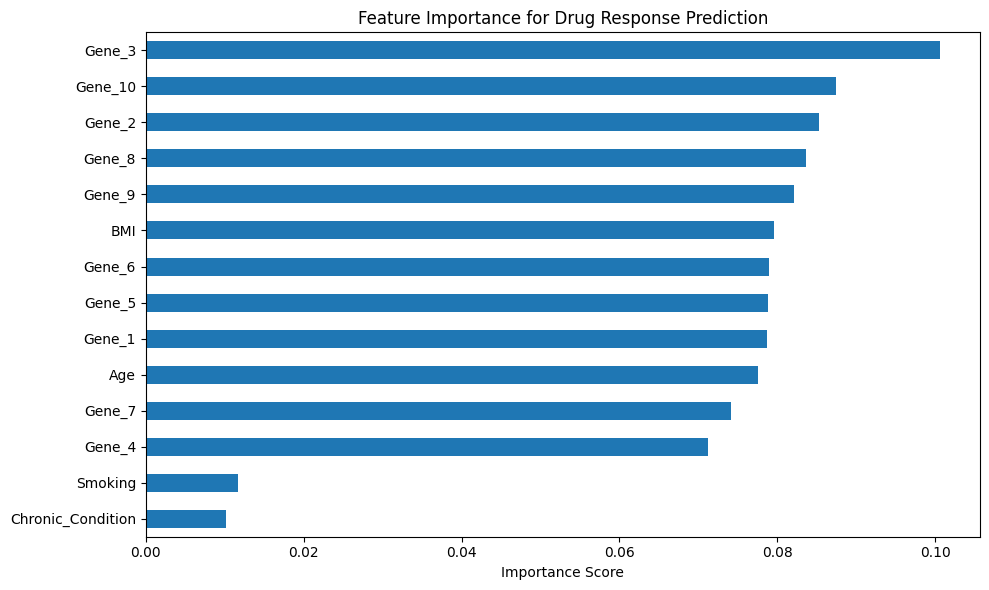

In [1]:
# 📊 Drug Response Predictor — Machine Learning Project

"""
This notebook predicts drug effectiveness for patients based on input features using supervised learning.
We'll explore and visualize the dataset, preprocess the data, and train classification models such as Decision Trees and Random Forests.
Our goal is to accurately classify patient responses to specific drug treatments, enabling insights into personalized medicine.
This hands-on project demonstrates the application of machine learning in bioinformatics and computational biophysics.
"""
# drug_response_predictor.inpyb

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Simulate patient features
np.random.seed(42)
num_samples = 500

# Simulated gene/protein expression features
gene_features = pd.DataFrame({
    f"Gene_{i}": np.random.normal(loc=0, scale=1, size=num_samples)
    for i in range(1, 11)
})

# Simulated clinical features
clinical_data = pd.DataFrame({
    "Age": np.random.randint(20, 80, size=num_samples),
    "BMI": np.random.normal(25, 5, size=num_samples),
    "Smoking": np.random.choice([0, 1], size=num_samples),
    "Chronic_Condition": np.random.choice([0, 1], size=num_samples)
})

# Simulated binary drug response (0 = non-responsive, 1 = responsive)
labels = pd.Series(np.random.choice([0, 1], size=num_samples), name="Drug_Response")

# Combine all into one DataFrame
X = pd.concat([gene_features, clinical_data], axis=1)
y = labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance for Drug Response Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
